<a href="https://colab.research.google.com/github/munnurumahesh03-coder/machine_learning_for_regression/blob/main/CatBoost_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CatBoost**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
medical_charges_url = 'messy_regression_dataset_20k.csv'

In [3]:
medic_df = pd.read_csv(medical_charges_url)

In [4]:
medic_df

,age,bmi,children,smoker,region,charges
0,56.0,25.457487,NaN,no,unknown,10611.599579
1,69.0,33.020537,0.0,YES,northeast,8859.172448
2,46.0,21.914141,3.0,no,NaN,7428.800879
3,32.0,31.731564,NaN,no,northwest,11515.330480
4,60.0,26.849758,0.0,NaN,northeast,5051.955748
...,...,...,...,...,...,...
19995,41.0,26.225017,2.0,NaN,southeast,8427.582262
19996,51.0,36.264055,0.0,no,southwest,13299.557047
19997,25.0,30.035071,NaN,no,southwest,7287.692750
19998,61.0,26.106643,2.0,no,southwest,13269.658318


# **Exploratory Data Analysis**

---



In [5]:
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       18514 non-null  object 
 1   bmi       18389 non-null  float64
 2   children  17802 non-null  float64
 3   smoker    12943 non-null  object 
 4   region    18382 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(3), object(3)
memory usage: 937.6+ KB


In [6]:
medic_df.describe()

,bmi,children,charges
count,18389.000000,17802.000000,18874.000000
mean,30.023139,2.000899,10000.479531
std,4.968658,1.416515,2508.054122
min,10.387999,0.000000,556.900591
25%,26.644991,1.000000,8300.698129
50%,30.037319,2.000000,9997.044815
75%,33.377548,3.000000,11686.585621
max,52.395421,4.000000,19650.222798


In [7]:
medic_df.isnull().sum()

,0
age,1486
bmi,1611
children,2198
smoker,7057
region,1618
charges,1126


In [8]:
# Try to convert 'age' to a number. Values that can't be converted will become NaN.
original_age_dtype = medic_df['age'].dtype
medic_df['age'] = pd.to_numeric(medic_df['age'], errors='coerce')

# Find the rows where the conversion failed (i.e., where 'age' is now NaN but wasn't before)
# This isn't a perfect way to see the original bad values, but it confirms the issue.

# A better way: Let's see how many new NaNs were created
new_nan_count = medic_df['age'].isnull().sum()
print(f"The 'age' column now has {new_nan_count} total missing values.")

print("\nNew info for the 'age' column:")
medic_df.info()

The 'age' column now has 1686 total missing values.

New info for the 'age' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       18314 non-null  float64
 1   bmi       18389 non-null  float64
 2   children  17802 non-null  float64
 3   smoker    12943 non-null  object 
 4   region    18382 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(4), object(2)
memory usage: 937.6+ KB


In [9]:
medic_df.describe()

,age,bmi,children,charges
count,18314.000000,18389.000000,17802.000000,18874.000000
mean,48.516436,30.023139,2.000899,10000.479531
std,17.878012,4.968658,1.416515,2508.054122
min,18.000000,10.387999,0.000000,556.900591
25%,33.000000,26.644991,1.000000,8300.698129
50%,48.000000,30.037319,2.000000,9997.044815
75%,64.000000,33.377548,3.000000,11686.585621
max,79.000000,52.395421,4.000000,19650.222798


In [10]:
medic_df.dropna(subset=['charges'],inplace=True)

In [11]:
medic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18874 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       17288 non-null  float64
 1   bmi       17347 non-null  float64
 2   children  16814 non-null  float64
 3   smoker    12185 non-null  object 
 4   region    17336 non-null  object 
 5   charges   18874 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.0+ MB


# **Visualization**

---



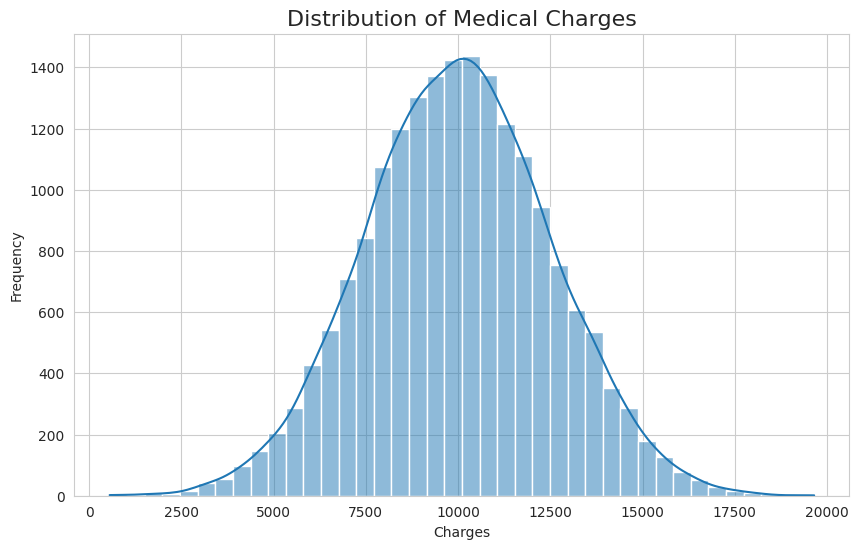

In [12]:
# Set the plotting style
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=medic_df, x='charges', kde=True, bins=40)
plt.title('Distribution of Medical Charges', fontsize=16)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [13]:
# First, let's see the unique values to confirm the issue
print("Original unique values in 'smoker' column:")
print(medic_df['smoker'].unique())

# Now, let's clean the column
# We will replace all variations of 'yes' with 'yes' and all variations of 'no' with 'no'
medic_df['smoker'] = medic_df['smoker'].replace({
    'YES': 'yes',
    'Nope': 'no'
})

# Let's check the unique values again to confirm it's fixed
print("\nCleaned unique values in 'smoker' column:")
print(medic_df['smoker'].unique())

Original unique values in 'smoker' column:
['no' 'YES' nan 'yes' 'Nope']

Cleaned unique values in 'smoker' column:
['no' 'yes' nan]


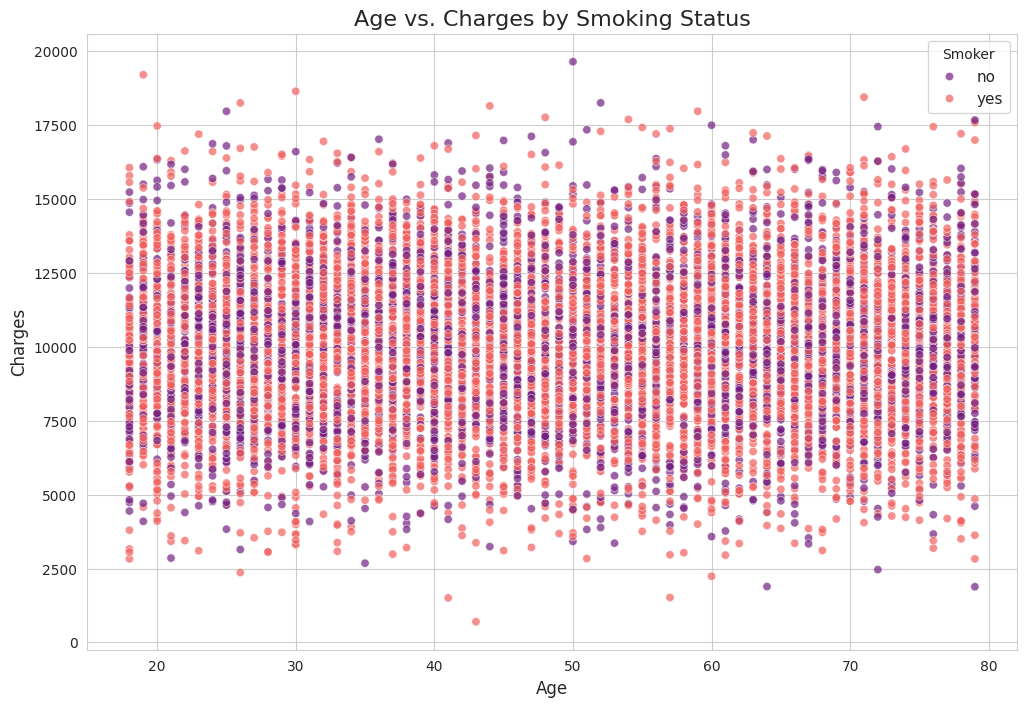

In [14]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=medic_df, x='age', y='charges', hue='smoker', alpha=0.7, palette='magma')
plt.title('Age vs. Charges by Smoking Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.legend(title='Smoker', fontsize=11)
plt.show()

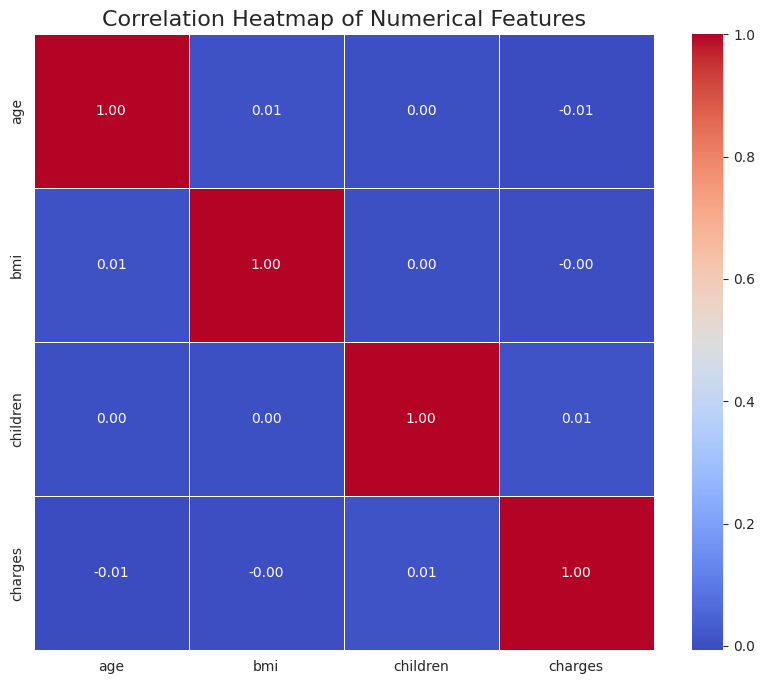

In [15]:
# First, create a correlation matrix
# We will only use the numeric columns for this
numeric_cols = medic_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

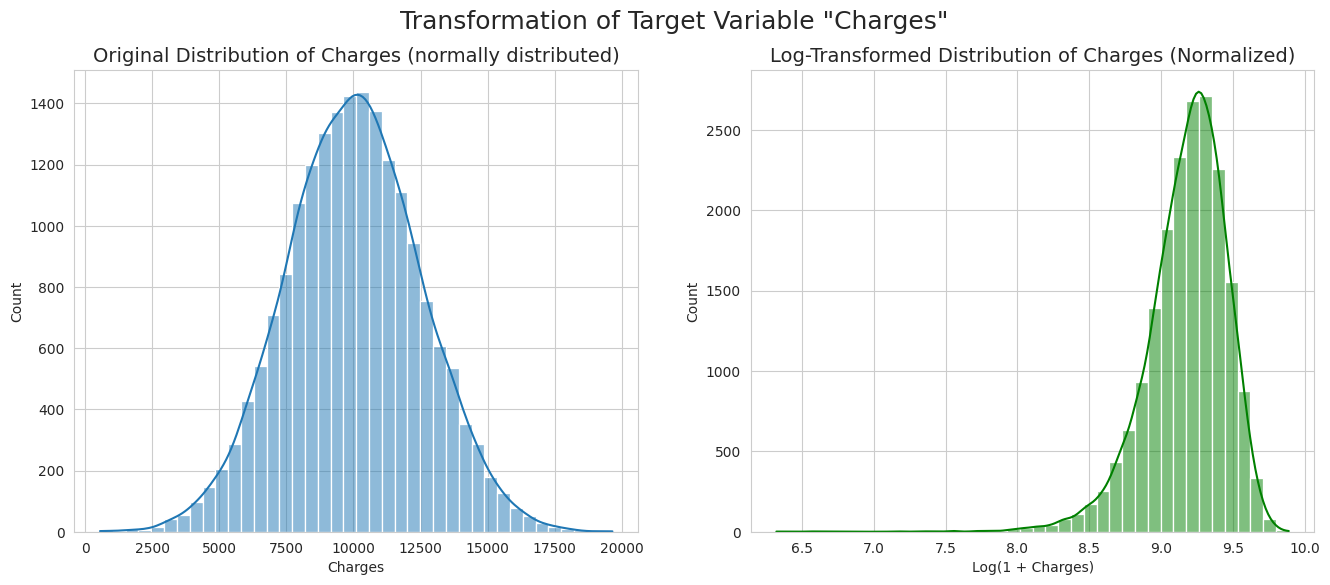

In [16]:
# Set the plotting style
sns.set_style('whitegrid')

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original Distribution of Charges
sns.histplot(data=medic_df, x='charges', kde=True, ax=axes[0], bins=40)
axes[0].set_title('Original Distribution of Charges (normally distributed)', fontsize=14)
axes[0].set_xlabel('Charges')

# Plot 2: Log-Transformed Distribution of Charges
# We apply the log transform directly in the plotting call for this visualization
log_charges = np.log1p(medic_df['charges'].dropna()) # dropna() for visualization
sns.histplot(log_charges, kde=True, ax=axes[1], bins=40, color='green')
axes[1].set_title('Log-Transformed Distribution of Charges (Normalized)', fontsize=14)
axes[1].set_xlabel('Log(1 + Charges)')

plt.suptitle('Transformation of Target Variable "Charges"', fontsize=18)
plt.show()

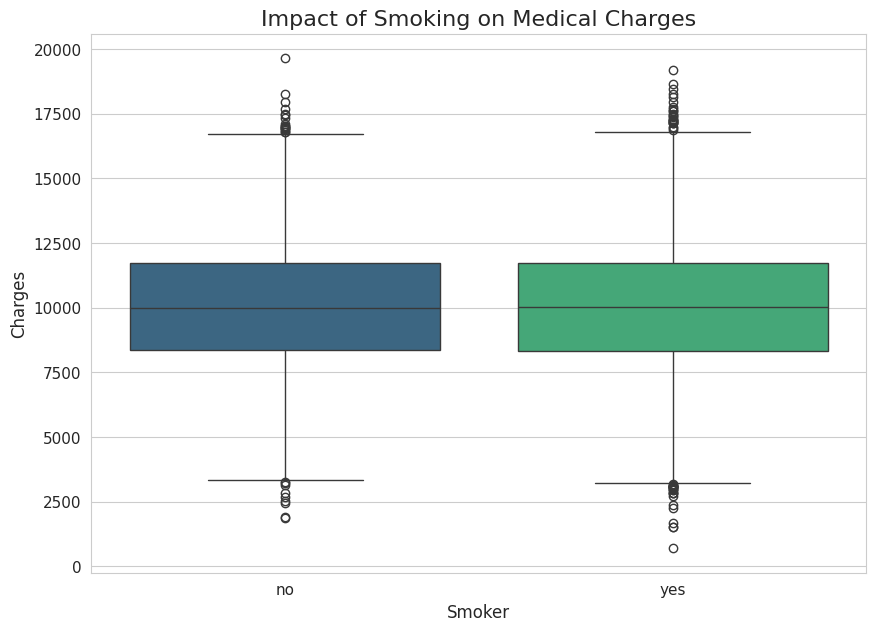

In [17]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=medic_df, x='smoker', y='charges', palette='viridis')
plt.title('Impact of Smoking on Medical Charges', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

# **Feature Engineering**

---



In [18]:
df_engineered = medic_df.copy()

In [19]:
df_engineered['charges'] = np.log1p(df_engineered['charges'])
print("'charges' column has been log-transformed.")

'charges' column has been log-transformed.


In [20]:
df_engineered['is_smoker'] = df_engineered['smoker'].str.lower().map({'yes': 1}).fillna(0).astype(int)
print("'is_smoker' binary feature created.")

'is_smoker' binary feature created.


In [21]:
bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df_engineered['bmi_category'] = pd.cut(df_engineered['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
print("'bmi_category' feature created.")

'bmi_category' feature created.


In [22]:
df_engineered = df_engineered.drop(columns=['smoker'])
print("Original 'smoker' column dropped.")

Original 'smoker' column dropped.


In [23]:
print("\n--- Feature Engineering Complete! ---")
print("The DataFrame is now ready for splitting.")
print("\nUpdated DataFrame head:")
df_engineered.head()


--- Feature Engineering Complete! ---
The DataFrame is now ready for splitting.

Updated DataFrame head:


,age,bmi,children,region,charges,is_smoker,bmi_category
0,56.0,25.457487,NaN,unknown,9.269797,0,Overweight
1,69.0,33.020537,0.0,northeast,9.089322,1,Obese
2,46.0,21.914141,3.0,NaN,8.913254,0,Healthy
3,32.0,31.731564,NaN,northwest,9.351521,0,Obese
4,60.0,26.849758,0.0,northeast,8.527729,0,Overweight


In [24]:
df_engineered.describe()

,age,bmi,children,charges,is_smoker
count,17288.000000,17347.000000,16814.000000,18874.000000,18874.000000
mean,48.523427,30.020216,2.005115,9.175182,0.423440
std,17.865768,4.959569,1.416935,0.277874,0.494117
min,18.000000,10.387999,0.000000,6.324181,0.000000
25%,33.000000,26.620603,1.000000,9.024215,0.000000
50%,48.000000,30.035766,2.000000,9.210145,0.000000
75%,64.000000,33.381963,3.000000,9.366282,1.000000
max,79.000000,52.395421,4.000000,9.885895,1.000000


# **Train Test Split**

---



In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_val_df, test_df = train_test_split(df_engineered, test_size=0.2, random_state=42)

In [27]:
train_df, val_df = train_test_split(train_val_df,test_size=0.2,random_state=42)

In [28]:
print("---------- Data Split Complete ----------")
print(f"Training_set_shape: {train_df.shape}")
print(f"Validation_set_shape: {val_df.shape}")
print(f"Testing_set_shape: {test_df.shape}")

---------- Data Split Complete ----------
Training_set_shape: (12079, 7)
Validation_set_shape: (3020, 7)
Testing_set_shape: (3775, 7)


# **Input and Target Columns**

---



In [29]:
target_column = 'charges'

In [30]:
X_train = train_df.drop(columns=[target_column]).copy()
y_train = train_df[target_column].copy()

In [31]:
X_train

,age,bmi,children,region,is_smoker,bmi_category
3646,20.0,20.819974,4.0,northeast,0,Healthy
466,23.0,42.929876,0.0,southwest,1,Obese
10162,41.0,29.386143,4.0,northwest,0,Overweight
14490,48.0,28.479795,1.0,southwest,1,Overweight
12454,74.0,24.427464,0.0,unknown,1,Healthy
...,...,...,...,...,...,...
16946,19.0,24.360719,0.0,NaN,0,Healthy
7435,42.0,39.005226,NaN,northeast,1,Obese
1417,62.0,28.867363,1.0,unknown,0,Overweight
13067,75.0,26.678595,NaN,northeast,0,Overweight


In [32]:
y_train

,charges
3646,9.451659
466,9.229449
10162,8.943451
14490,9.291505
12454,9.003493
...,...
16946,9.228927
7435,8.786578
1417,9.189870
13067,9.275411


In [33]:
X_val = val_df.drop(columns=[target_column]).copy()
y_val = val_df[target_column].copy()

In [34]:
X_val

,age,bmi,children,region,is_smoker,bmi_category
16680,76.0,29.871624,1.0,NaN,1,Overweight
17690,34.0,27.633944,3.0,NaN,1,Overweight
4783,22.0,24.575160,3.0,northeast,0,Healthy
11366,36.0,21.596102,2.0,northeast,0,Healthy
14092,31.0,33.812553,1.0,unknown,0,Obese
...,...,...,...,...,...,...
456,21.0,39.679305,0.0,southeast,0,Obese
11809,NaN,NaN,0.0,southwest,0,NaN
6386,64.0,31.595604,2.0,southwest,0,Obese
12192,67.0,37.178700,4.0,northwest,1,Obese


In [35]:
y_val

,charges
16680,9.481014
17690,9.240936
4783,8.977266
11366,9.107897
14092,8.657220
...,...
456,9.327615
11809,9.100854
6386,9.533569
12192,9.550142


In [36]:
X_test = test_df.drop(columns=target_column).copy()
y_test = test_df[target_column].copy()

In [37]:
X_test

,age,bmi,children,region,is_smoker,bmi_category
14634,47.0,37.549972,0.0,northeast,1,Obese
5921,77.0,26.370410,2.0,southeast,1,Overweight
43,33.0,28.736876,NaN,northeast,1,Overweight
14450,55.0,27.677657,4.0,northwest,0,Overweight
16005,57.0,33.888202,1.0,northwest,1,Obese
...,...,...,...,...,...,...
1007,66.0,28.044218,2.0,southeast,0,Overweight
13748,34.0,34.619872,1.0,northeast,1,Obese
4652,60.0,25.117872,0.0,unknown,0,Overweight
8285,NaN,35.592707,NaN,northwest,1,Obese


In [38]:
y_test

,charges
14634,8.720637
5921,9.226468
43,8.977354
14450,9.171982
16005,9.644838
...,...
1007,9.446024
13748,8.876026
4652,7.383367
8285,9.338097


In [39]:
print("---------- Input and Target Columns Split Complete ----------")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

---------- Input and Target Columns Split Complete ----------
X_train shape: (12079, 6)
y_train shape: (12079,)


In [40]:
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_val shape: (3020, 6)
y_val shape: (3020,)


In [41]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (3775, 6)
y_test shape: (3775,)


In [42]:
print("\n Columns in X_train:")
print(X_train.columns.tolist())


 Columns in X_train:
['age', 'bmi', 'children', 'region', 'is_smoker', 'bmi_category']


# **Pipeline**

---



In [43]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [44]:
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- Phase 2: Pipelined Modeling with CatBoost ---

# Step 1: Identify numerical and categorical columns from X_train.
# This logic is consistent with all previous models.
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()

# Move 'is_smoker' to the categorical list as per our established workflow.
if 'is_smoker' in numerical_features:
    numerical_features.remove('is_smoker')
    categorical_features.append('is_smoker')

print(f"Identified Numerical columns: {numerical_features}")
print(f"Identified Categorical columns: {categorical_features}")


# Step 2: Define the preprocessing transformers.

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])


# Step 3: Create the master preprocessor object.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# Step 4: Create the final CatBoost pipeline.

catboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(
        task_type='GPU',
        random_state=42,
        verbose=0
    ))
])


# Step 5: Display the final pipeline to verify its structure.
print("\n--- Full CatBoost (GPU-Enabled) Pipeline Created Successfully ---")
catboost_pipeline


Identified Numerical columns: ['age', 'bmi', 'children']
Identified Categorical columns: ['region', 'bmi_category', 'is_smoker']

--- Full CatBoost (GPU-Enabled) Pipeline Created Successfully ---


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['region', 'bmi_category',
                                                   'is_smoker'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x78f1c28c5bb0>)])

# **CatBoost Regressor**

---



In [45]:
from sklearn.metrics import r2_score

# --- Fitting and Evaluating the Baseline CatBoost Model ---
print("--- Fitting the baseline CatBoost model---")
catboost_pipeline.fit(X_train, y_train)
print("Baseline model fitted successfully.")

--- Fitting the baseline CatBoost model---
Baseline model fitted successfully.


In [46]:
y_pred_val = catboost_pipeline.predict(X_val)

In [47]:
r2_val_baseline = r2_score(y_val, y_pred_val)

In [48]:
print(f"\n--- Baseline CatBoost Performance (Validation Set) ---")
print(f"R-squared (R²): {r2_val_baseline:.6f}")

print("\n--- Comparison ---")
# The official champion from the previous model is the Tuned XGBoost.
print("Our current champion (Tuned XGBoost) had a final test R² of -0.000691.")
print(f"This default CatBoost model achieved an R² of {r2_val_baseline:.6f}.")

if r2_val_baseline > -0.000691:
    print("\nObservation: AN INCREDIBLE START! The baseline CatBoost is already outperforming our current champion.")
else:
    print("\nObservation: This baseline is not an improvement, but hyperparameter tuning is where we will unlock its potential.")


--- Baseline CatBoost Performance (Validation Set) ---
R-squared (R²): -0.006306

--- Comparison ---
Our current champion (Tuned XGBoost) had a final test R² of -0.000691.
This default CatBoost model achieved an R² of -0.006306.

Observation: This baseline is not an improvement, but hyperparameter tuning is where we will unlock its potential.


# **Helper Function**

---



In [49]:
def test_cat_params(params_to_test):

    # 1. Create the KNN pipeline, passing the parameters to the regressor
    catboost_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        # The ** operator unpacks the dictionary into keyword arguments
        ('regressor', CatBoostRegressor(**params_to_test,random_state=42,task_type='GPU',verbose=0))
    ])

    # 2. Fit the pipeline
    catboost_pipeline.fit(X_train, y_train)

    # 3. Get the R-squared scores
    train_r2 = catboost_pipeline.score(X_train, y_train)
    val_r2 = catboost_pipeline.score(X_val, y_val)

    # 4. Create a result dictionary
    # Start with a copy of the parameters you tested
    result = params_to_test.copy()

    result['training_r2'] = train_r2
    result['validation_r2'] = val_r2

    return result

# **HyperParameter Tuning**

---



# **Depth**

---



In [50]:
depth_df = pd.DataFrame(test_cat_params({'depth': d}) for d in range(1, 11))

display(depth_df)

,depth,training_r2,validation_r2
0,1,0.003586,-0.001018
1,2,0.011249,-0.003141
2,3,0.017465,-0.002855
3,4,0.023274,-0.003904
4,5,0.030611,-0.005175
5,6,0.035842,-0.006306
6,7,0.038684,-0.004161
7,8,0.045907,-0.007795
8,9,0.045435,-0.008583
9,10,0.051406,-0.009218


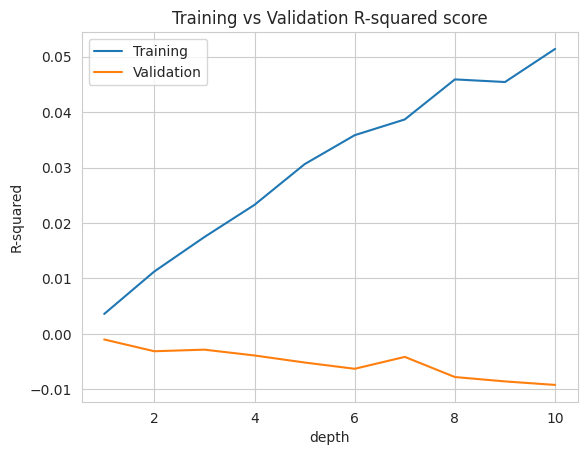

In [51]:
plt.figure()
plt.plot(depth_df['depth'],depth_df['training_r2'])
plt.plot(depth_df['depth'],depth_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('depth')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **L2_leaf_reg**

---



In [52]:
L2_leaf_reg_df = pd.DataFrame(test_cat_params({'depth':1,'l2_leaf_reg': l2}) for l2 in [1,3,5,10,25,50])

display(L2_leaf_reg_df)

,depth,l2_leaf_reg,training_r2,validation_r2
0,1,1,0.003016,-0.000793
1,1,3,0.003043,-0.000903
2,1,5,0.003061,-0.000929
3,1,10,0.003123,-0.000990
4,1,25,0.003109,-0.001113
5,1,50,0.003108,-0.001190


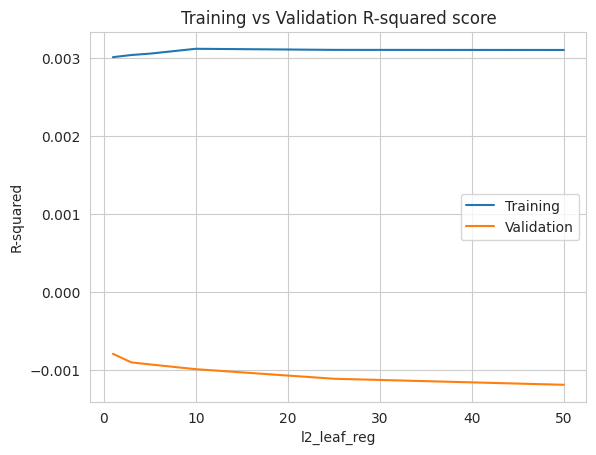

In [53]:
plt.figure()
plt.plot(L2_leaf_reg_df['l2_leaf_reg'],L2_leaf_reg_df['training_r2'])
plt.plot(L2_leaf_reg_df['l2_leaf_reg'],L2_leaf_reg_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('l2_leaf_reg')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **min_data_in_leaf**

---



In [54]:
min_data_in_leaf_df = pd.DataFrame(test_cat_params({'min_data_in_leaf': m}) for m in [1,5,10,25,50,100])

display(min_data_in_leaf_df)

,min_data_in_leaf,training_r2,validation_r2
0,1,0.035842,-0.006306
1,5,0.035842,-0.006306
2,10,0.035842,-0.006306
3,25,0.035842,-0.006306
4,50,0.035842,-0.006306
5,100,0.035842,-0.006306


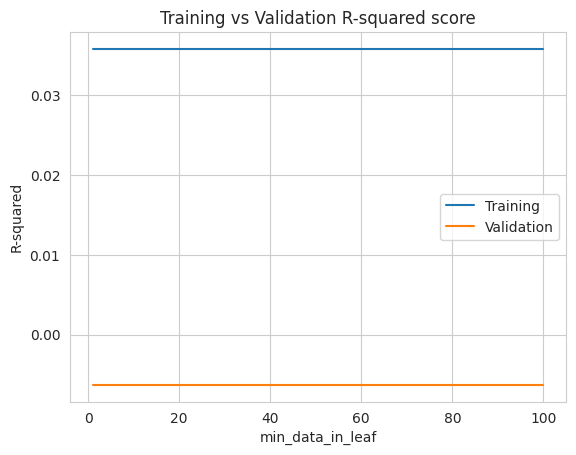

In [55]:
plt.figure()
plt.plot(min_data_in_leaf_df['min_data_in_leaf'],min_data_in_leaf_df['training_r2'])
plt.plot(min_data_in_leaf_df['min_data_in_leaf'],min_data_in_leaf_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('min_data_in_leaf')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **Iterations**

---



In [56]:
iterations_df = pd.DataFrame(test_cat_params({'iterations': i}) for i in [100,200,400,500,1000,1500])

display(iterations_df)

,iterations,training_r2,validation_r2
0,100,0.080255,-0.021557
1,200,0.101927,-0.026274
2,400,0.126832,-0.028519
3,500,0.035424,-0.005492
4,1000,0.035842,-0.006306
5,1500,0.036003,-0.007522


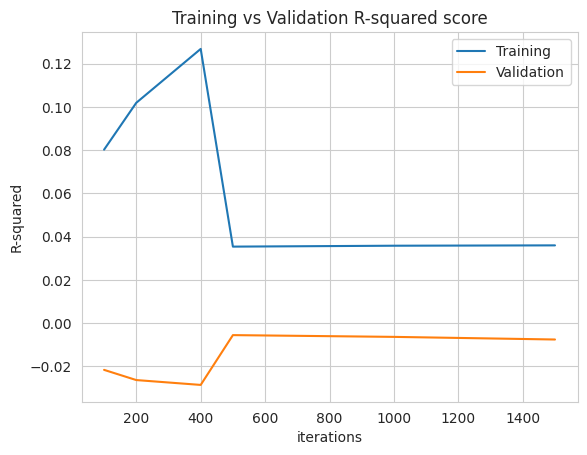

In [57]:
plt.figure()
plt.plot(iterations_df['iterations'],iterations_df['training_r2'])
plt.plot(iterations_df['iterations'],iterations_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('iterations')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **Learning_rate**

---



In [58]:
learning_rate_df = pd.DataFrame(test_cat_params({'learning_rate':lr})for lr in [0.001,0.005,0.01,0.1,0.2,0.3,0.4])

display(learning_rate_df)

,learning_rate,training_r2,validation_r2
0,0.001,0.004293,-0.000058
1,0.005,0.014977,-0.001150
2,0.010,0.022218,-0.001951
3,0.100,0.041459,-0.010223
4,0.200,0.052815,-0.011896
5,0.300,0.066179,-0.025286
6,0.400,0.068914,-0.027832


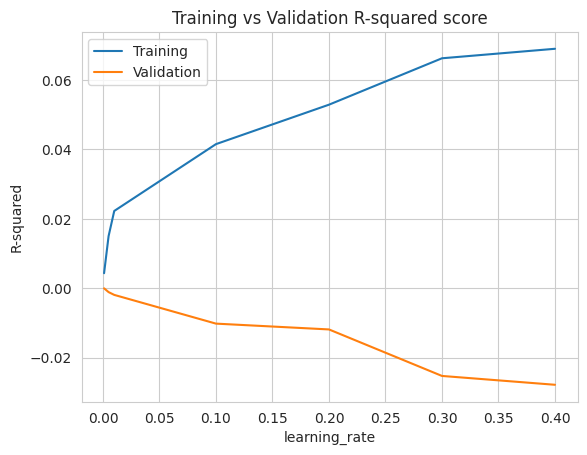

In [59]:
plt.figure()
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['training_r2'])
plt.plot(learning_rate_df['learning_rate'],learning_rate_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('learning_rate')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **Subsample**

---



In [60]:
subsample_df = pd.DataFrame(test_cat_params({'bootstrap_type': 'Bernoulli','subsample':s}) for s in [0.6,0.7,0.8,0.9,1.0])

display(subsample_df)

,bootstrap_type,subsample,training_r2,validation_r2
0,Bernoulli,0.6,0.033640,-0.005940
1,Bernoulli,0.7,0.032963,-0.005739
2,Bernoulli,0.8,0.030054,-0.004699
3,Bernoulli,0.9,0.027428,-0.003660
4,Bernoulli,1.0,0.028077,-0.003740


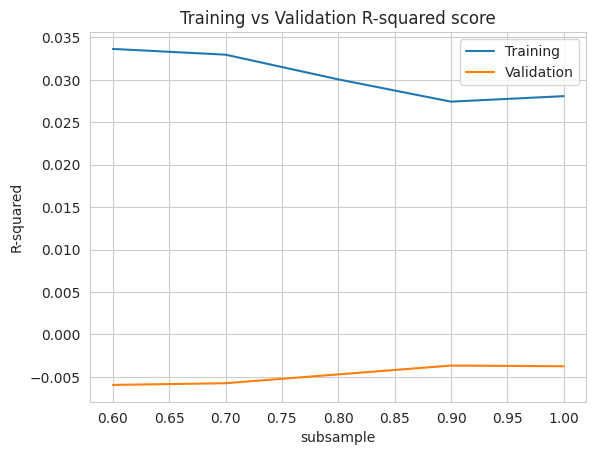

In [61]:
plt.figure()
plt.plot(subsample_df['subsample'],subsample_df['training_r2'])
plt.plot(subsample_df['subsample'],subsample_df['validation_r2'])
plt.title('Training vs Validation R-squared score')
plt.xlabel('subsample')
plt.ylabel('R-squared')
plt.legend(['Training','Validation'])

# **RandomizedSearch CV**

---



In [62]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor

# --- Final Tuning with RandomizedSearchCV for CatBoost ---

# Step 1: Define the hyperparameter search space.

param_distributions = {
    'regressor__depth': [1, 2],
    'regressor__l2_leaf_reg': [1, 3, 5],
    'regressor__iterations': [200, 300, 500],
    'regressor__learning_rate': [0.001, 0.005, 0.01],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__bootstrap_type': ['Bernoulli'],

    # Parameters we are locking or ignoring based on our findings:
    'regressor__min_data_in_leaf': [1]
}

# Step 2: Create the CatBoost pipeline for the search.
search_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(
        task_type='GPU',
        random_state=42,
        verbose=0
    ))
])

# Step 3: Create the RandomizedSearchCV object.
random_search_cat = RandomizedSearchCV(
    estimator=search_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    cv=5,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Fit the search to the training data.
print("--- Starting RandomizedSearchCV for CatBoost ---")
print("This will test 100 combinations of our 'extreme simplicity' strategy.")
random_search_cat.fit(X_train, y_train)
print("\n--- RandomizedSearchCV Complete! ---")

# Step 5: Display the best results found by the search.
print(f"\nBest validation R² score found: {random_search_cat.best_score_:.6f}")
print("\nBest Hyperparameters:")
print(random_search_cat.best_params_)


--- Starting RandomizedSearchCV for CatBoost ---
This will test 100 combinations of our 'extreme simplicity' strategy.
Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- RandomizedSearchCV Complete! ---

Best validation R² score found: -0.000429

Best Hyperparameters:
{'regressor__subsample': 1.0, 'regressor__min_data_in_leaf': 1, 'regressor__learning_rate': 0.01, 'regressor__l2_leaf_reg': 3, 'regressor__iterations': 200, 'regressor__depth': 2, 'regressor__bootstrap_type': 'Bernoulli'}


# **Evaluation and Selection**

---



In [64]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# --- Phase 3: Evaluation & Selection ---

# Step 1: Get the best model from our faster RandomizedSearchCV.
# Make sure to use the correct variable name from the last run.
final_cat_model = random_search_cat.best_estimator_

print("--- Evaluating the Champion CatBoost Model on the Test Set ---")

# Step 2: Make predictions on the unseen test data.
y_pred_test = final_cat_model.predict(X_test)

# Step 3: Calculate the final performance metrics on the test set.
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_test))

# Step 4: Display the final, official results.
print("\n--- Official CatBoost Model Performance (Test Set) ---")
print(f"Final Test R-squared (R²): {r2_test:.6f}")
print(f"Final Test Mean Absolute Error (MAE): ${mae_test:,.2f}")

# Step 5: Compare the test score with the validation score for our final consistency check.
print("\n--- Consistency Check ---")
print(f"Best Validation R² (from RandomizedSearchCV): {random_search_cat.best_score_:.6f}")
print(f"Final Test R² (official score): {r2_test:.6f}")

if abs(random_search_cat.best_score_ - r2_test) < 0.05:
    print("\nSuccess: The test score is consistent with the validation score. The model is reliable.")
else:
    print("\nWarning: The test score differs significantly from the validation score.")


--- Evaluating the Champion CatBoost Model on the Test Set ---

--- Official CatBoost Model Performance (Test Set) ---
Final Test R-squared (R²): -0.000712
Final Test Mean Absolute Error (MAE): $2,064.88

--- Consistency Check ---
Best Validation R² (from RandomizedSearchCV): -0.000429
Final Test R² (official score): -0.000712

Success: The test score is consistent with the validation score. The model is reliable.


# **Saving through Joblib**

---



In [65]:
import joblib

# Step 1: The model to be saved is the best estimator from our successful search.
final_cat_model = random_search_cat.best_estimator_

# Step 2: Define the filename for our CatBoost model.
filename = '09_catboost_regressor.joblib'

# Step 3: Save the final model pipeline to the file.
print(f"---saving the final model to '{filename}' ---")
try:
    joblib.dump(final_cat_model, filename)
    print("MODEL SAVED SUCCESSFULLY! Your work is safe.")
except Exception as e:
    print(f"AN ERROR OCCURRED DURING SAVING: {e}")
    print("Please try to resolve the error and save again immediately.")

---saving the final model to '09_catboost_regressor.joblib' ---
MODEL SAVED SUCCESSFULLY! Your work is safe.


# **Deployment**

---



In [66]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np

# --- 1. LOAD THE TRAINED CATBOOST MODEL ---
# The filename must match the one we just saved.
model_filename = '09_catboost_regressor.joblib'

try:
    # Load the entire pipeline object (preprocessor + model)
    loaded_model = joblib.load(model_filename)
    print(f"Model '{model_filename}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: Model file '{model_filename}' not found. The app will not work.")
    loaded_model = None
except Exception as e:
    print(f"An error occurred while loading the model: {e}")
    loaded_model = None


# --- 2. CREATE THE PREDICTION FUNCTION ---
# This function connects the Gradio interface to our model pipeline.
def predict_cost(age, sex, bmi, children, region, is_smoker):
    """
    Predicts medical insurance cost based on user inputs using the loaded CatBoost model.
    The order of arguments must match the 'inputs' list below.
    """
    if loaded_model is None:
        return "ERROR: Model could not be loaded. Please check the file path."

    # --- Feature Engineering Step (same as in training) ---
    # The model's preprocessor expects the 'bmi_category' feature.
    if bmi < 18.5:
        bmi_category = 'Underweight'
    elif 18.5 <= bmi < 25:
        bmi_category = 'Healthy'
    elif 25 <= bmi < 30:
        bmi_category = 'Overweight'
    else:
        bmi_category = 'Obese'

    # --- DataFrame Creation ---

    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'bmi': [bmi],
        'children': [children],
        'region': [region],
        'is_smoker': [is_smoker],
        'bmi_category': [bmi_category]
    })

    # --- Make the Prediction ---
    # Use the loaded pipeline to predict. It handles all preprocessing automatically.
    predicted_log_cost = loaded_model.predict(input_data)

    # Reverse the log-transformation to get the final cost in dollars.
    predicted_cost = np.expm1(predicted_log_cost[0])

    # Format the output as a currency string.
    return f"${predicted_cost:,.2f}"


# --- 3. DEFINE THE GRADIO INTERFACE COMPONENTS ---
# These are the interactive sliders, dropdowns, and radio buttons for the user.
inputs = [
    gr.Slider(minimum=18, maximum=80, value=45, label="Age", info="Your age in years."),
    gr.Radio(choices=['male', 'female'], value='female', label="Sex"),
    gr.Slider(minimum=15, maximum=55, value=30.0, label="BMI", info="Your Body Mass Index."),
    gr.Slider(minimum=0, maximum=5, step=1, value=1, label="Children", info="Number of dependent children."),
    gr.Dropdown(choices=['southwest', 'southeast', 'northwest', 'northeast', 'unknown'], value='northwest', label="Region"),
    gr.Radio(choices=[("Yes", 1), ("No", 0)], value=0, label="Are you a smoker?")
]

output = gr.Textbox(label="Predicted Annual Insurance Cost")


# --- 4. CREATE AND LAUNCH THE APP ---
title = "Medical Insurance Cost Predictor"
description = """
### The "Ultimate Regressor Gauntlet" - Model 09: CatBoost
This application predicts insurance costs using a **Tuned CatBoost Regressor**.
Enter your details below to see the prediction.
"""

app = gr.Interface(
    fn=predict_cost,
    inputs=inputs,
    outputs=output,
    title=title,
    description=description,
    theme=gr.themes.Soft(),
    allow_flagging='never'
)

# Launch the app.
app.launch(share=True)

Model '09_catboost_regressor.joblib' loaded successfully.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://77aad5cd61a771de1b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
